# Solution: Modelling virulence evolution

Loading packages and inputs:

In [1]:
# LOAD THE PACKAGES:
library(deSolve)
library(ggplot2)

# Vector storing the initial number of people in each compartment (at timestep 0)
initial_state_values <- c(S = 999,         # the whole population we are modelling is susceptible to infection
                          I = 1,           # the epidemic starts with a single infected person
                          R = 0)           # there is no prior immunity in the population
                
# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 100, by = 0.1)   # from 0 to 100 days in daily intervals

Extending the SIR model code to include disease induced mortality:

In [2]:
# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order): time, state and parameters
sir_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {  # tell R to unpack variable names from the state and parameters inputs    
        
    # Calculating the total population size N (the sum of the number of people in each compartment)
      N <- S+I+R
      
    # Defining lambda as a function of beta and I:
      lambda <- beta* I/N
        
    # The differential equations
      dS <- -lambda * S             
      dI <- lambda * S - gamma * I - mu * I     # infected people die (move out of I) at a rate mu
      dR <- gamma * I 
      
    # Return the number of people in the S, I and R compartments at each timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR))) 
    })
  
}

## Example 1: Low virulence

In this case, $\beta$ = 0.15, $\gamma$ = 0.25 and $\mu$ = 0.01. Note that $R_0 = \frac{\beta}{\gamma + \mu}$, and under these parameters, is lower than 1. Therefore no epidemic occurs. 

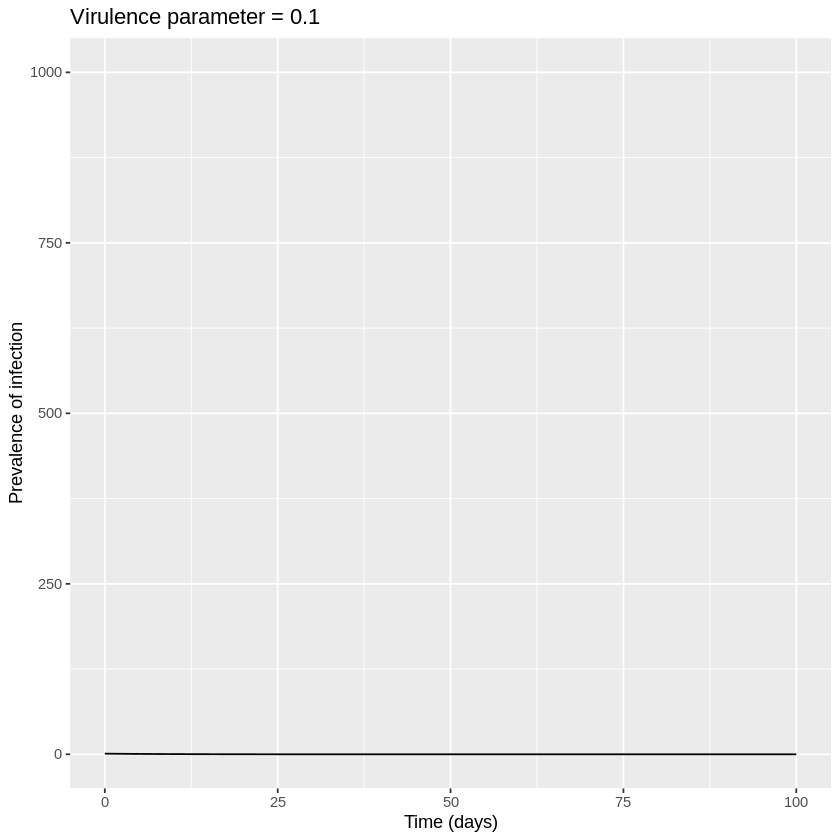

In [3]:
x <- 0.1

# Vector storing the parameters describing the transition rates in units of days^-1
# Where beta and mu are a function of x
parameters <- c(beta = 1.5*x,     # infection rate
                gamma = 1/4,      # recovery rate
                mu = 1*x^2)       # disease-induced mortality rate


# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# Plot the prevalence of infection
ggplot(data = output,                                                    # specify object containing data to plot
       aes(x = time, y = I)) +                                           # assign columns to axes
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Prevalence of infection") +                                      # add label for y axis
  labs(title = paste("Virulence parameter =", x)) +                      # add title
  ylim(c(0,1000))                                                        # add total population size as y axis limit

## Example 2: Intermediate virulence

In this case, $\beta$ = 0.75, $\gamma$ = 0.25 and $\mu$ = 0.25. In this case R<sub>0</sub> = 1.5, and an epidemic occurs with a peak prevalence of about 100 cases.

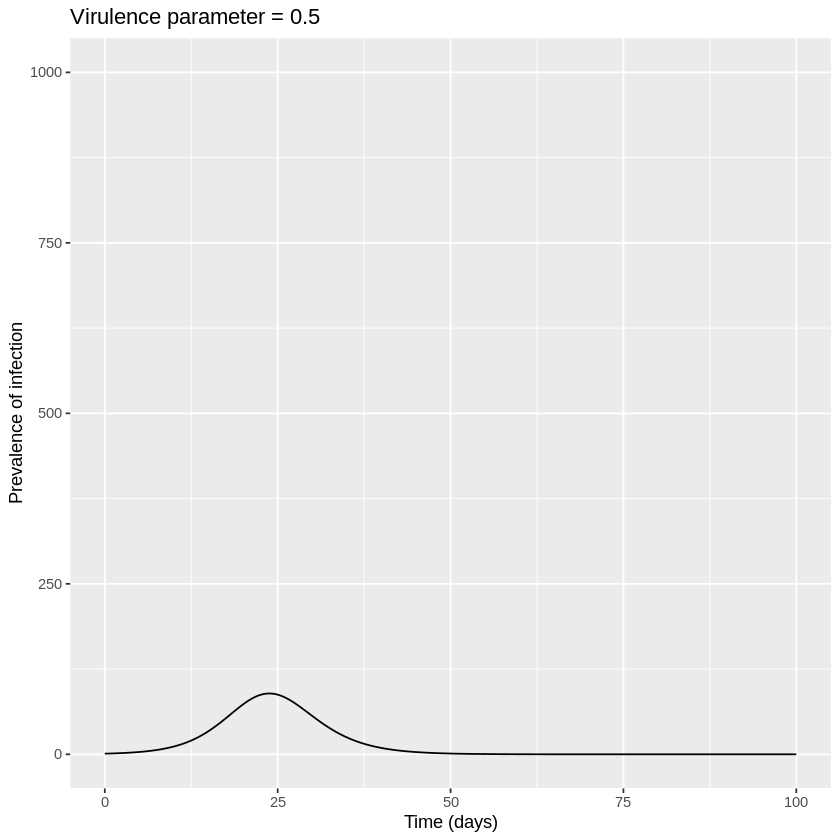

In [4]:
x <- 0.5

# Vector storing the parameters describing the transition rates in units of days^-1
# Where beta and mu are a function of x
parameters <- c(beta = 1.5*x,     # infection rate
                gamma = 1/4,      # recovery rate
                mu = 1*x^2)       # disease-induced mortality rate


# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# Plot the prevalence of infection
ggplot(data = output,                                                    # specify object containing data to plot
       aes(x = time, y = I)) +                                           # assign columns to axes
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Prevalence of infection") +                                      # add label for y axis
  labs(title = paste("Virulence parameter =", x)) +                      # add title
  ylim(c(0,1000))                                                        # add total population size as y axis limit

## Example 3: High virulence

In this case, $\beta$ = 1.35, $\gamma$ = 0.25 and $\mu$ = 0.81 - both transmissibility and mortality are higher than in the previous examples. An epidemic occurs, but with a lower peak prevalence than with intermediate virulence.

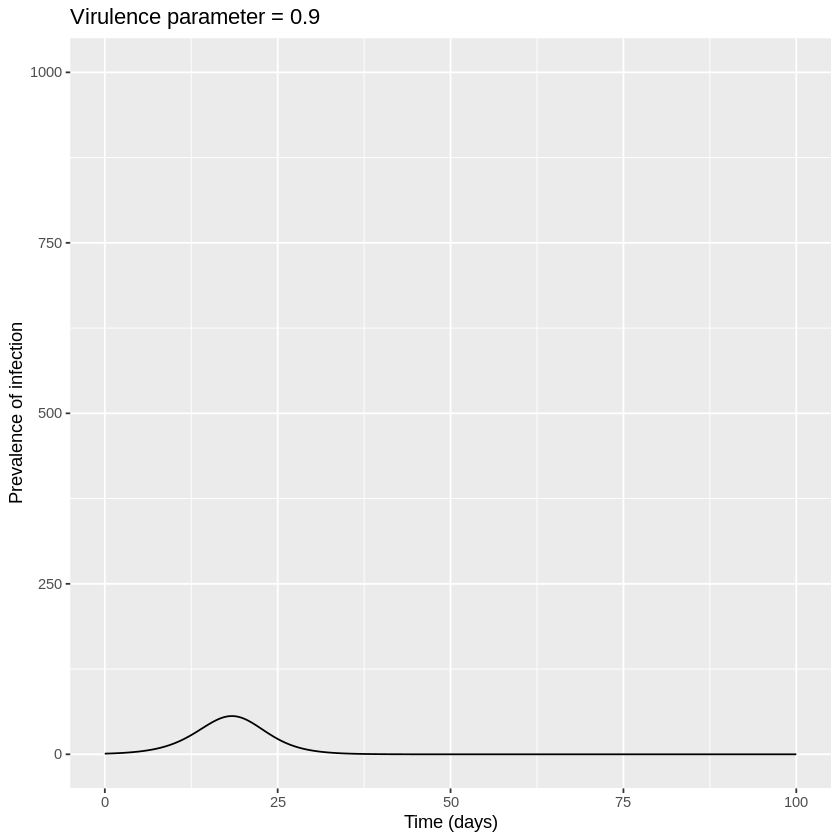

In [5]:
x <- 0.9

# Vector storing the parameters describing the transition rates in units of days^-1
# Where beta and mu are a function of x
parameters <- c(beta = 1.5*x,     # infection rate
                gamma = 1/4,      # recovery rate
                mu = 1*x^2)       # disease-induced mortality rate


# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# Plot the prevalence of infection
ggplot(data = output,                                                    # specify object containing data to plot
       aes(x = time, y = I)) +                                           # assign columns to axes
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Prevalence of infection") +                                      # add label for y axis
  labs(title = paste("Virulence parameter =", x)) +                      # add title
  ylim(c(0,1000))                                                        # add total population size as y axis limit

### What is the optimal value of $x$ in terms of producing the biggest epidemics?

These are just 3 examples, but if you try more values for $x$, you will confirm that the size of the epidemic is biggest with a virulence parameter of $x$ = 0.5. 

### Optional question: Can you mathematically derive the optimal value of $x$ for any value of $\beta_0$, $\gamma$ and $\mu_0$?

Remember R<sub>0</sub>, the basic reproduction number. The larger R<sub>0</sub> is, the larger the epidemic size and peak prevalence. In this model, we have:

\begin{align}
R_0 &= \frac{\beta}{\gamma+\mu}
\end{align}

Writing $\beta$ and $\mu$ as functions of $x$ as given above, we have:

\begin{align}
R_0 &= \frac{\beta_0 x}{\gamma+\mu_0 x^2}
\end{align}

Setting $\frac{dR_0}{dx} = 0$, and solving for $x$, we ultimately find: 

\begin{align}
x &= \sqrt{\frac{\gamma}{\mu_0}}
\end{align}

In this etivity we have looked at only a simple example for the trade-off hypothesis, a well-known concept in infectious disease ecology. 

For a very good discussion of this hypothesis, and the role of modelling in understanding it, see the following paper:

Alizon, S., Hurford, A., Mideo, N., & Van Baalen, M. (2009). Virulence evolution and the trade‐off hypothesis: history, current state of affairs and the future. Journal of evolutionary biology, 22(2), 245-259.